In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning Dataframe</h1>

In [3]:
df = pd.read_csv('CSV_Files/House_details.csv')
df.to_csv('CSV_Files/House_details.csv', index=False)

Get the lay of the land of the Dataframe

In [4]:
df.nunique()

Type of property                25
Location                      1470
postal code                    830
immo code                     8379
Price                         1306
Address                       1754
Bedrooms                        24
Energy class                    13
Primary energy consumption     999
Furnished                        2
Terrace                          2
Terrace surface                126
Surface of the plot           1641
Living room surface            103
Number of frontages              9
Construction year              163
Building condition               7
Bathrooms                       14
Shower rooms                    16
Office                           2
Toilets                         16
Kitchen type                     9
Heating type                     8
province                        11
dtype: int64

In [5]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,4,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,4,1988,Good,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,2,0,Good,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,2,0,Good,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,0,As new,1,0,0,0,Installed,0,Antwerp


Remove any missing values, strings and characters in the Price column that do not show sheer numeric value

In [6]:

df =df.replace({'€':'','\€':'','\)':'','\.':''},regex=True) 

In [7]:

df = df[df['Price'].notnull() & (df['Price'] != '')]

In [8]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

Replace any 'yes' or 'no' with binary numbers

In [9]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

Remove the Outdoor parking space as the only result was 0

In [10]:
df =df.drop('Outdoor parking space', axis=1) 

KeyError: "['Outdoor parking space'] not found in axis"

In [27]:
# Assuming your DataFrame is named 'df' and the column you want to filter is 'Price'

# Check if each value in the 'Price' column has 6 or more digits and less than or equal to 7 digits
condition = (df['Price'] >= 1e6) & (df['Price'] <= 1e7)

# Apply the condition to the 'Price' column to filter out values that don't meet the criteria
filtered_df = df[condition]


In [31]:
filtered_df.sort_values(by='Price',ascending=False).head()  # not df.head() as it will only give the first view of teh dataframe and that is then sorted

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
3167,exceptional-property,knokke-heist,8300,10657912,6975000.0,Albert plein 10,5,A,62.0,0,...,4,2019,As new,5,4,1,4,USA hyper equipped,Gas,West Flanders
206,mansion,ixelles,1050,10666915,6900000.0,"Avenue J Burgers, 2 b24",6,NS,0.0,0,...,3,0,As new,7,0,0,0,0,0,Brussels Capital Region
2157,apartment-block,saint-gilles,1060,10660584,6500000.0,Avenue Legrand 30,0,NS,0.0,0,...,3,0,As new,0,0,1,0,0,Gas,Brussels Capital Region
1329,house,knokke-heist,8300,10663663,6495000.0,Albert plein 10,5,B,128.0,0,...,4,2008,As new,4,3,0,5,Hyper equipped,Gas,West Flanders
2915,house,knokke-zoute,8300,10658623,6495000.0,Kustlaan 277,5,B,125.0,0,...,4,2008,As new,4,0,1,5,Hyper equipped,Gas,West Flanders


Inspect how many missing values are there in the dataframe

In [17]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       5
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [18]:
#df = df[df.iloc[:, -1].astype(str).str.strip() != '']

df.dropna(subset=['province'], inplace=True)  # dropping missing values in column province

In [19]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       5
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [20]:
df.to_csv('CSV_Files/House_details.csv', index=False)

<h1>Visualisation</h1>

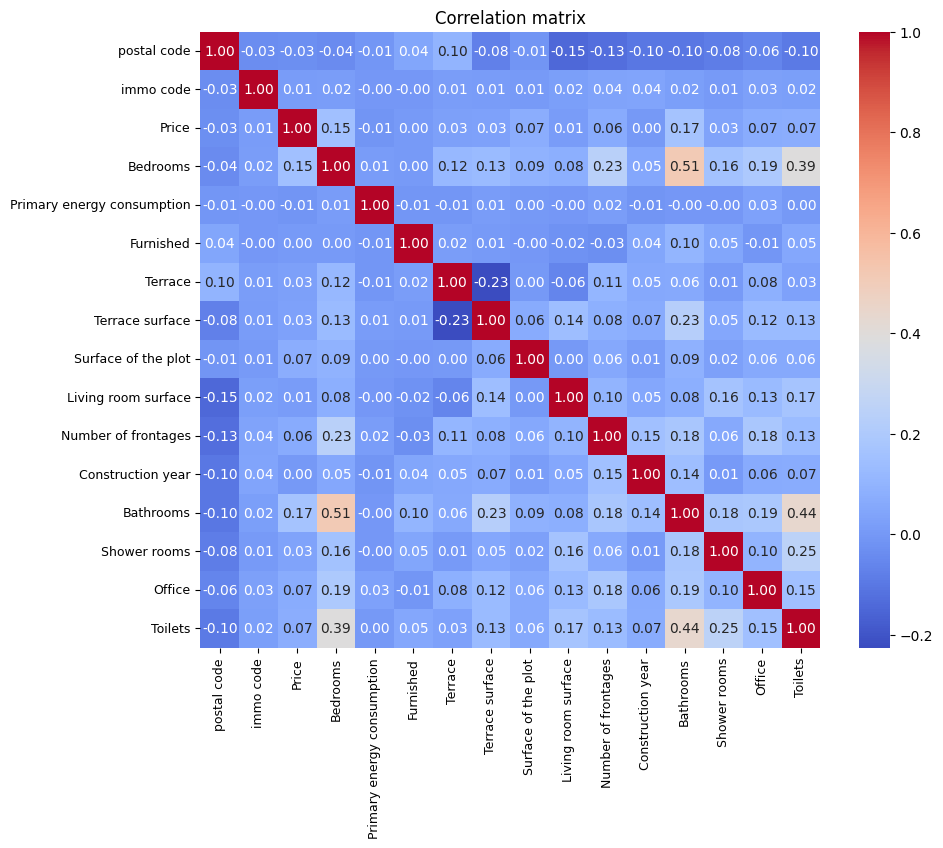

In [21]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

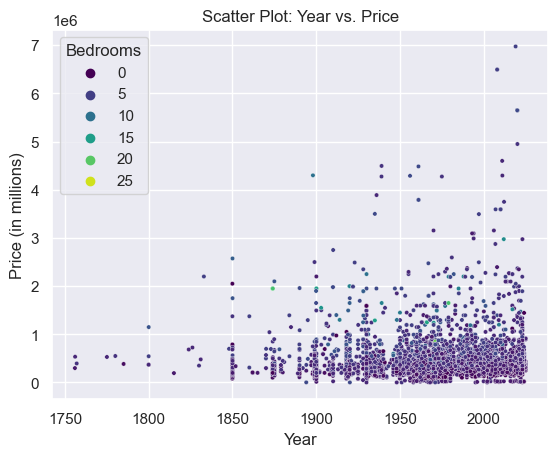

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df

# Filter out rows with Construction year of 0
filtered_df = df[df['Construction year'] != 0]

# Extract the required columns from the filtered DataFrame
years = filtered_df['Construction year']
prices = filtered_df['Price']
categories = filtered_df['Bedrooms']

# Add jitter to the x-axis within each category
jitter = np.random.uniform(low=-0.1, high=0.1, size=len(years))
jittered_years = years + jitter

# Set the style
sns.set(style='darkgrid')

# Create the scatter plot using Seaborn
sns.scatterplot(x=jittered_years, y=prices, hue=categories, palette='viridis', s=10)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Year vs. Price')

# Add a colorbar to indicate the number of bedrooms
plt.colorbar(label='Bedrooms')

# Display the plot
plt.show()



In [23]:
df['Price'].sort_values(ascending=True)

2436        1000.0
2221        1133.0
2198        1150.0
8292        1200.0
6485        1220.0
           ...    
7973    31900000.0
2805    33900000.0
3406    34487193.0
4672    36290830.0
786     43900000.0
Name: Price, Length: 8379, dtype: float64

In [24]:
df['Price'].max()

43900000.0